In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold


In [4]:
# Load the train and test data
train_data = pd.read_csv('/content/train_LZdllcl.csv')
test_data = pd.read_csv('/content/test_2umaH9m.csv')

# Inspect the first few rows of the training data
train_data.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [8]:
train_data['education'].mode()

,education
0,Bachelor's


In [9]:
train_data['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


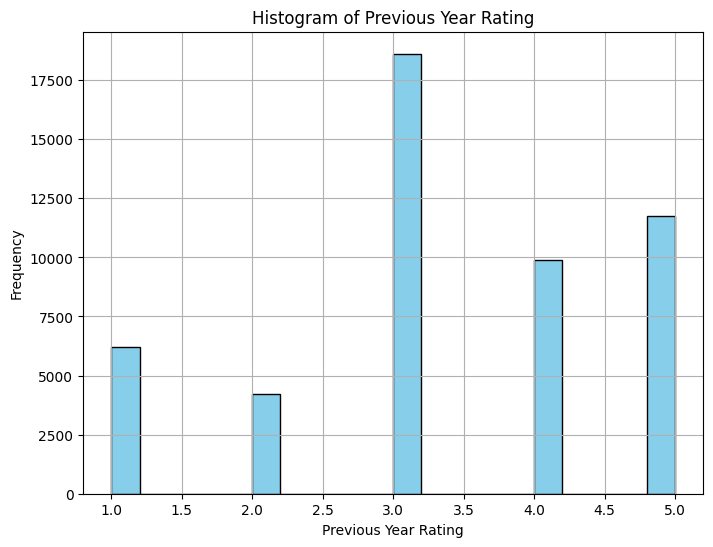

In [10]:
import matplotlib.pyplot as plt

# Assuming you have the train_data dataframe already loaded
plt.figure(figsize=(8, 6))
plt.hist(train_data['previous_year_rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
train_data['previous_year_rating'].mean()

3.329255780917055

In [12]:
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)
train_data['education'].fillna(value="Bachelor's", inplace=True)

<ipython-input-12-430a86e284b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].mean(), inplace=True)
<ipython-input-12-430a86e284b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [13]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [14]:
test_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [16]:
test_data['education'].mode()

,education
0,Bachelor's


In [17]:
test_data['previous_year_rating'].mean()

3.339145677645539

In [18]:
test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].mean(), inplace=True)
test_data['education'].fillna(value="Bachelor's", inplace=True)

<ipython-input-18-ca6a5caf7cb1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].mean(), inplace=True)
<ipython-input-18-ca6a5caf7cb1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [19]:
test_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [20]:
# Encoding categorical variables (e.g., gender, recruitment channel, etc.)
label_encoders = {}
categorical_columns = ['department', 'region', 'education', 'recruitment_channel', 'gender']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col])
    test_data[col] = label_encoders[col].transform(test_data[col])

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int64  
 2   region                54808 non-null  int64  
 3   education             54808 non-null  int64  
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  int64  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.9 MB


In [22]:
# Features and target variable
X = train_data.drop(['employee_id', 'is_promoted'], axis=1)
y = train_data['is_promoted']
X_test = test_data.drop(['employee_id'], axis=1)

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'no_of_trainings', 'previous_year_rating', 'length_of_service', 'avg_training_score']

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [23]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [27]:
# Calculate the F1 score
f1 = f1_score(y_val, y_val_pred)
print(f'Validation F1 Score: {f1}')

Validation F1 Score: 0.42235004108463436


In [28]:
# Make predictions on the test data
y_test_pred = model.predict(X_test)

In [29]:
# Prepare the submission file
submission = pd.DataFrame({'employee_id': test_data['employee_id'], 'is_promoted': y_test_pred})
submission.to_csv('sample_submission.csv', index=False)

In [30]:
from sklearn.model_selection import GridSearchCV
# Example for hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [31]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [32]:
# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [33]:
# Evaluate the tuned model
y_val_pred = best_model.predict(X_val)
f1 = f1_score(y_val, y_val_pred)

In [34]:
print(f'Tuned Validation F1 Score: {f1}')

Tuned Validation F1 Score: 0.42857142857142855


In [35]:
# Use the final model to predict the test data
y_test_pred = best_model.predict(X_test)

In [36]:
predictions= y_test_pred

In [37]:
# Step 8: Replace the target column in the test data with the predicted values
test_data['is_promoted'] = predictions

In [38]:
# Prepare the final submission file
final_submission = pd.DataFrame({'employee_id': test_data['employee_id'], 'is_promoted': y_test_pred})
final_submission.to_csv('final_submission.csv', index=False)